In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

df=pd.read_csv("/content/user_behavior_dataset.csv")
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [24]:
le=preprocessing.LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Device Model']=le.fit_transform(df['Device Model'])
df['Operating System']=le.fit_transform(df['Operating System'])
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,0,393,6.4,1872,67,1122,40,1,4
1,2,1,0,268,4.7,1331,42,944,47,0,3
2,3,3,0,154,4.0,761,32,322,42,1,2
3,4,0,0,239,4.8,1676,56,871,20,1,3
4,5,4,1,187,4.3,1367,58,988,31,0,3


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
x=df[['Gender','Age','User ID','Device Model','Operating System','App Usage Time (min/day)','Screen On Time (hours/day)','Battery Drain (mAh/day)','Number of Apps Installed','Data Usage (MB/day)']].values
y=df['User Behavior Class'].values
print(x)
print(y)


[[1.000e+00 4.000e+01 1.000e+00 ... 1.872e+03 6.700e+01 1.122e+03]
 [0.000e+00 4.700e+01 2.000e+00 ... 1.331e+03 4.200e+01 9.440e+02]
 [1.000e+00 4.200e+01 3.000e+00 ... 7.610e+02 3.200e+01 3.220e+02]
 ...
 [0.000e+00 5.000e+01 6.980e+02 ... 9.420e+02 2.200e+01 4.570e+02]
 [1.000e+00 4.400e+01 6.990e+02 ... 4.310e+02 1.300e+01 2.240e+02]
 [0.000e+00 2.300e+01 7.000e+02 ... 1.306e+03 4.900e+01 8.280e+02]]
[4 3 2 3 3 2 4 5 4 4 1 3 4 3 3 5 2 3 1 5 2 5 4 3 3 2 4 5 4 4 3 3 3 1 5 1 2
 5 4 4 3 5 2 2 2 5 5 2 5 5 4 3 2 2 5 1 1 5 4 4 5 4 1 5 4 3 3 2 5 1 4 5 4 1
 1 3 1 2 1 3 5 2 4 1 3 4 2 1 2 4 2 3 1 2 4 4 5 5 1 3 1 3 2 3 2 1 2 1 3 3 2
 5 3 2 4 2 1 3 1 2 4 5 5 5 3 5 4 3 2 2 5 4 2 1 1 5 1 3 5 5 3 4 2 1 5 3 4 1
 3 2 5 1 2 4 1 2 1 4 4 2 1 1 4 1 3 5 5 1 3 5 2 1 2 4 1 3 3 3 3 5 2 4 5 1 5
 5 4 1 2 1 2 1 4 3 4 3 3 2 1 2 5 2 1 1 2 4 1 2 5 3 4 5 2 1 2 5 4 5 5 2 4 2
 4 5 2 5 4 3 2 4 2 5 5 2 2 1 5 4 1 5 1 5 2 4 1 3 1 4 2 1 1 4 5 2 1 4 4 3 3
 5 1 4 5 1 4 5 3 5 3 4 4 3 2 2 2 5 3 3 1 4 1 1 4 1 4 5 4 3 2 1 4 1 

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(y_pred)
#print(x_test)
print(y_test)
#print(x_train)
#print(y_train)

[3 3 3 4 3 4 5 3 5 3 1 1 3 2 4 3 3 2 3 5 1 3 1 1 3 5 4 3 3 3 3 1 2 3 4 2 4
 4 5 4 4 5 4 2 5 3 5 4 3 4 3 1 5 1 2 2 5 2 4 3 4 3 3 1 4 3 2 3 1 4 3 1 5 3
 5 5 3 3 2 2 2 1 4 3 2 3 5 4 4 3 4 5 2 2 5 4 5 5 2 1 4 3 1 4 2 3 1 5 5 1 2
 1 2 1 4 3 4 2 1 3 2 2 5 1 3 3 1 5 3 4 5 3 3 1 5 1 3 2 5 5]
[3 3 3 4 3 4 5 3 5 3 1 1 3 2 4 3 3 2 3 5 1 3 1 1 3 5 4 3 3 3 3 1 2 3 4 2 4
 4 5 4 4 5 4 2 5 3 5 4 3 4 3 1 5 1 2 2 5 2 4 3 4 3 3 1 4 3 2 3 1 4 3 1 5 3
 5 5 3 3 2 2 2 1 4 3 2 3 5 4 4 3 4 5 2 2 5 4 5 5 2 1 4 3 1 4 2 3 1 5 5 1 2
 1 2 1 4 3 4 2 1 3 2 2 5 1 3 3 1 5 3 4 5 3 3 1 5 1 3 2 5 5]


In [27]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
Logreg = LogisticRegression()
# # fit the model with data
Logreg.fit(x_train,y_train)
# prediction
y_pred=Logreg.predict(x_test)
print(y_pred)
print(y_test)



[[23  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 42  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 26]]
[4 2 4 5 2 4 5 3 5 4 1 1 3 1 5 5 2 1 3 5 1 4 1 1 3 5 3 3 3 4 3 2 3 5 4 2 3
 4 5 4 5 5 5 2 5 3 5 5 3 4 4 1 5 1 3 3 5 2 4 5 5 3 5 1 5 2 2 3 1 4 3 1 4 3
 5 5 3 3 2 2 1 1 4 2 1 3 5 4 5 2 4 5 1 2 5 4 5 5 1 1 5 3 1 4 4 3 1 5 5 1 1
 1 2 1 3 3 5 2 1 3 2 1 5 2 3 4 1 5 3 4 5 5 2 2 5 1 3 3 5 5]
[3 3 3 4 3 4 5 3 5 3 1 1 3 2 4 3 3 2 3 5 1 3 1 1 3 5 4 3 3 3 3 1 2 3 4 2 4
 4 5 4 4 5 4 2 5 3 5 4 3 4 3 1 5 1 2 2 5 2 4 3 4 3 3 1 4 3 2 3 1 4 3 1 5 3
 5 5 3 3 2 2 2 1 4 3 2 3 5 4 4 3 4 5 2 2 5 4 5 5 2 1 4 3 1 4 2 3 1 5 5 1 2
 1 2 1 4 3 4 2 1 3 2 2 5 1 3 3 1 5 3 4 5 3 3 1 5 1 3 2 5 5]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
accuracy=accuracy_score(y_test,y_pred)
print("accuracy",accuracy)

precision = precision_score(y_test,y_pred, average='macro')
print("precision",precision)

accuracy 0.65
precision 0.6393722943722944


<function print>

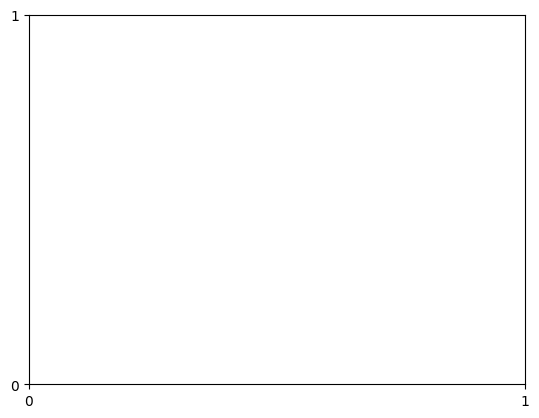

In [33]:
class_names= [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
print

<function matplotlib.pyplot.show(close=None, block=None)>

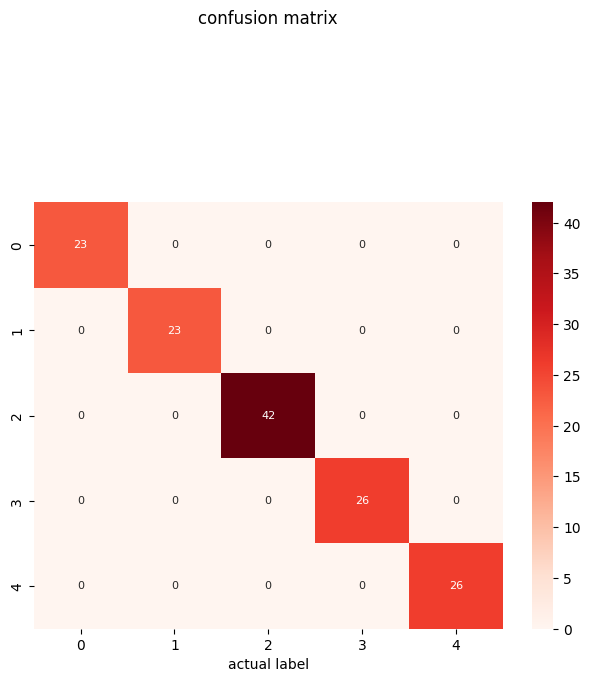

In [34]:
# create headmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="Reds",fmt="d",annot_kws={"size":8})
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title("confusion matrix", y=1.4)
plt.xlabel('actual label')
plt.show